# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [21]:
def StarFormationRate(L, Type, TIR=0):
    """Function that computes the Star Formation Rate
    of a galaxy following Kennicut & Evans 2012 Eq.12 (ARA&A 50)

    PARAMETERS
    ----------
        L: 'float'
            Luminosity of a galaxy in ergs/s
        Type: 'string'
            The wavelength: 'FUV', 'NUV', 'TIR', 'Halpha'
        TIR: 'float'
            Total infrared luminosity in erg/s (default =0)

    OUTPUT
    ------
        SFR: 'float'
            Log of the Star Formation Rate (Msun/yr)
    """

    if (Type == 'FUV'):
        logCx = 43.35 # Calibration from LFUV to SFR
        TIRc = 0.46 # Correction for dust absorption
    elif (Type == 'NUV'):
        logCx = 43.17 
        TIRc = 0.27
    elif (Type == 'Halpha'):
        logCx = 41.27
        TIRc = 0.0024
    elif (Type == 'TIR'):
        logCx = 43.41 
        TIRc = 0
    else:
        print('WARNING: Missing the Wavelength. I was expecting FUV, NUV, Halpha, or TIR')
        return
    
    # Correct the luminosity for dust using the TIR
    Lcorr = L + TIRc*TIR

    # star formation rate
    SFR = np.log10(Lcorr) - logCx

    return SFR        

Let's try to reproduce SFRs derived for the WLM Dwarf Irregular Galaxy using UV luminosities measured with Galex. 

Compare results to Table 1 from Lee et al. 2009 (who used the older Kennicutt 98 methods)
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED (Photometry and SED):
https://ned.ipac.caltech.edu/

In [5]:
# First need the Luminosity of the Sun in the right units
const.L_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>

In [7]:
LsunErgS = const.L_sun.to(u.erg/u.s).value
print(LsunErgS)

3.828e+33


In [27]:
# WLM Dwarf Irregular Galaxy
# From NED GALEX DATA

NUV_WLM = 1.71e7*LsunErgS
TIR_WLM = (2.48e6 + 3.21e5 + 2.49e6)*LsunErgS
#TIR = NIR + MIR + FIR

In [29]:
# Test
StarFormationRate(1e6*LsunErgS, 'Blah')

In [31]:
StarFormationRate(NUV_WLM, 'NUV', TIR_WLM)
#our answer is close to the table value from Lee et al. 2009. This is okay, and makes sense :D

-2.319186168309912

# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift, given its stellar mass

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [35]:
def SFRMainSequence(Mstar, z):
    """Function that computes the average SFR of a galaxy as a 
    function of stellar mass and redshift.

    PARAMETERS
    ----------
        Mstar: 'float'
            Stellar mass of the galaxy in Msun
        z: 'float'
            Redshit

    OUTPUT
    ------
        SFR: 'float'
            Log of the SFR (Msun/yr)
    """
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z -0.19*z**2

    SFR = alpha*(np.log10(Mstar) - 10.5) + beta

    return SFR

# Step 2

In [37]:
# MW stellar mass (disk) at z=0
MWmstar = 7.5e10


In [43]:
# SFR for a MW type galaxy

print(SFRMainSequence(MWmstar, 0))
print(10**SFRMainSequence(MWmstar, 0))

0.64254288437419
4.390792203431891


In [45]:
# MW at z = 1
print(SFRMainSequence(MWmstar, 1))
print(10**SFRMainSequence(MWmstar, 1))

1.5437849201332692
34.97719031976979


# Step 3

In [47]:
# create an array of stellar masses
Mass = np.linspace(1e8,1e12)

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\o'
C:\Users\ethan\AppData\Local\Temp\ipykernel_38648\2331770561.py:11: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
C:\Users\ethan\AppData\Local\Temp\ipykernel_38648\2331770561.py:12: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


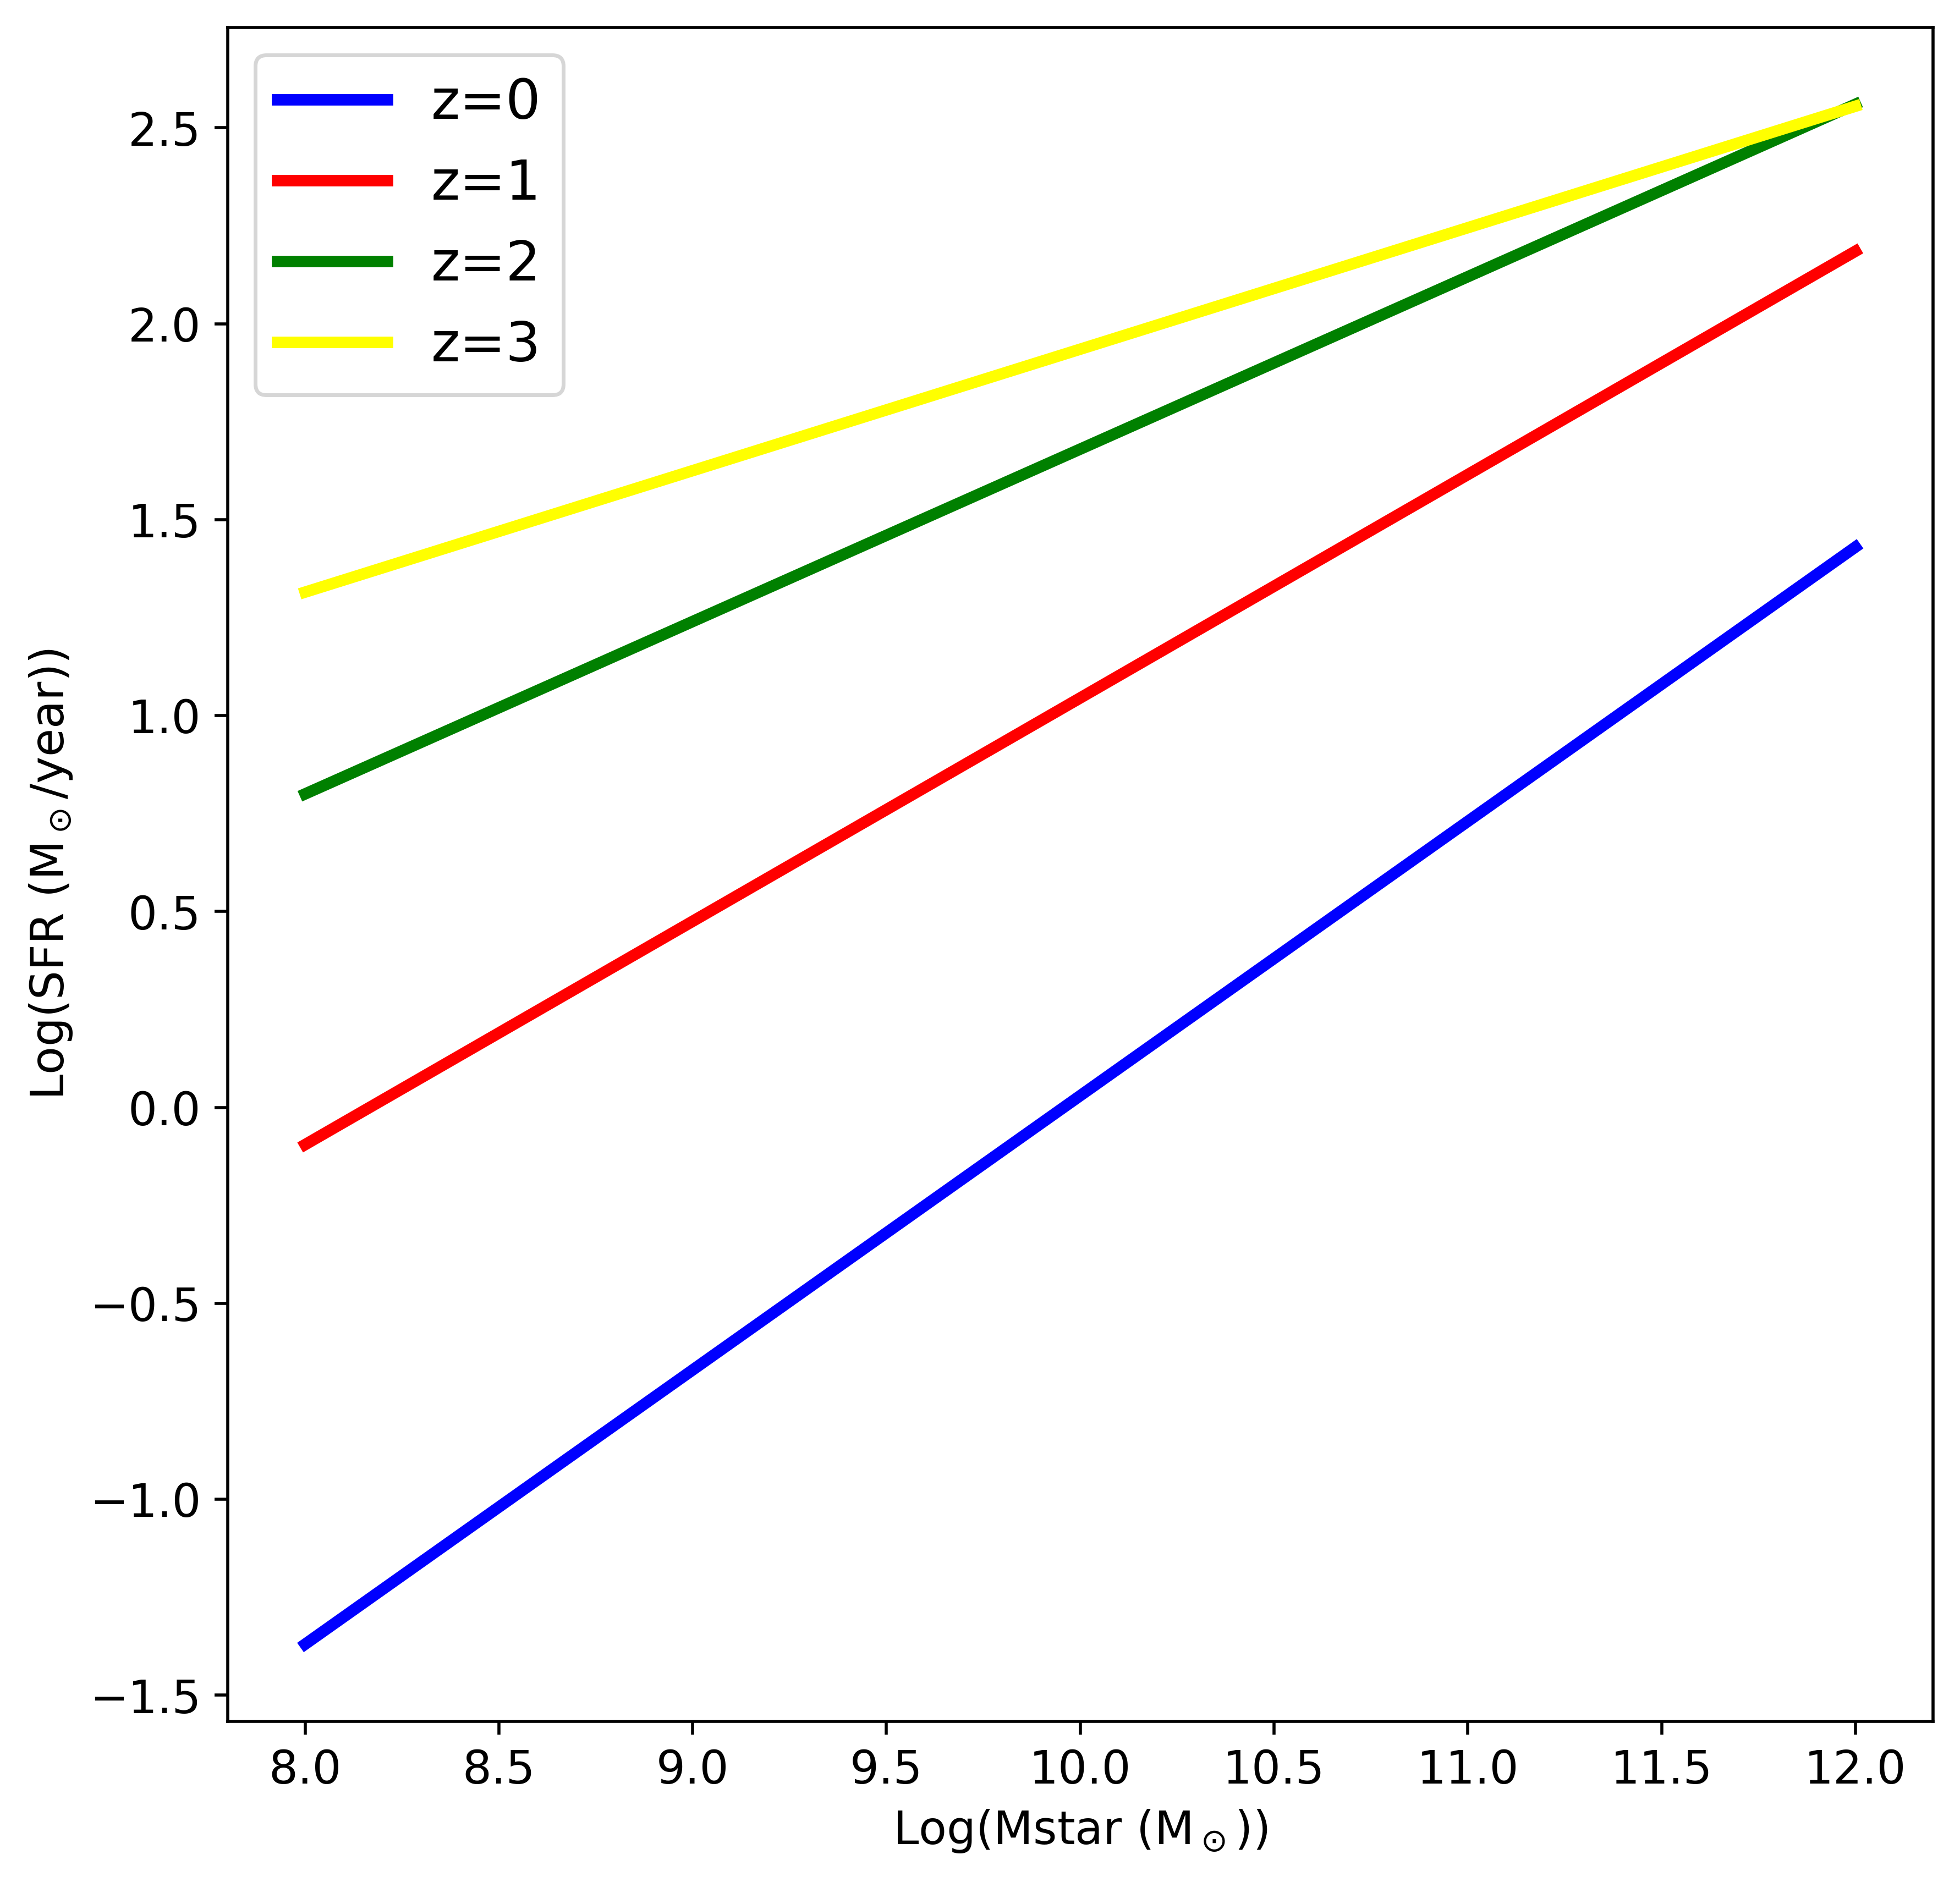

In [53]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.plot(np.log10(Mass), SFRMainSequence(Mass,0), color='blue', lw=3, label='z=0')  
plt.plot(np.log10(Mass), SFRMainSequence(Mass,1), color='red', lw=3, label='z=1')  
plt.plot(np.log10(Mass), SFRMainSequence(Mass,2), color='green', lw=3, label='z=2')  
plt.plot(np.log10(Mass), SFRMainSequence(Mass,3), color='yellow', lw=3, label='z=3')  

# Add axis labels
plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Save file
#plt.savefig('Lab8_SFR_MainSequence.png')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [55]:
# normal galaxies 
TIR_Normal = 1e10*LsunErgS
print(10**StarFormationRate(TIR_Normal, 'TIR'))

1.4892648150381245


In [57]:
# LIRGs  
TIR_HLIRG = 1e13*LsunErgS
print(10**StarFormationRate(TIR_HLIRG, 'TIR'))

1489.2648150381244


In [59]:
# ULIRGs
TIR_Normal = 1e10*LsunErgS
print(10**StarFormationRate(TIR_Normal, 'TIR'))

In [61]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS
print(10**StarFormationRate(TIR_HLIRG, 'TIR'))